<a href="https://colab.research.google.com/github/yasharma09/Health-Insurance-Cross-Sell-Prediction-Almabetter-Project-3-Classification-/blob/main/Final_%20notebook_Health_Insurance_Cross_Sell_Prediction_Classification_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Health Insurance Cross sell Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 - Yash Sharma (yasharma9120@gmail.com)**
##### **Team Member 2 - Mohit Nath (m.mohitmonu09@gmail.com**)
##### **Team Member 3 - Suryanh Singh (suryanx14@gmail.com**)

# **Project Summary -**


This Capstone project focuses on predicting whether customers who have previously purchased health insurance will opt for vehicle insurance. The insurance company aims to target the same customers who have already shown interest in health insurance. By predicting their likelihood to opt for vehicle insurance, the company can optimize its communication strategy, enhance its business model, and increase revenue. The dataset used for this project consists of customer information, including gender, driving license possession, previous vehicle insurance status, response regarding vehicle insurance, vehicle damage information, the duration of association with the company, region of residence, and annual premium price.

The following steps were performed in the project:

**A**. Extracted the head and tail of the dataset to examine the initial and final rows.

**B**. Extracted the description and info of the dataset to analyze statistical measures such as mean, minimum, maximum values, and non-null count.

**C**. Obtained the shape of the data to determine the number of rows and columns.

**D**. Checked for the presence of null values in all columns, finding that there were no null values.

**E**. Identified outliers in the Annual Premium column using the IQR method and removed them by setting limits. Boxplots were used to visualize the distribution after outlier removal.

**F**. Extracted a correlation heatmap and calculated the VIF (Variation Inflation Factor) to detect and address correlated and multicollinear variables.

**G**. Implemented resampling techniques to address class imbalance in the Response column, which represents customer responses regarding vehicle insurance.

Next, several classification machine learning models, including Logistic Regression, Random Forest Classifier, XGBoost Classifier, and Naive Bayes Classifier, were implemented on the cleaned dataset. VIF scores were calculated for all columns, and any column with a VIF score greater than 10 was dropped to mitigate collinearity.

The models were evaluated based on the F1 score, a measure of their performance. The project successfully conducted exploratory data analysis and derived valuable insights to address relevant business problems. Despite the data's irrelevance and size, the implemented models performed well.

# **GitHub Link -**

https://github.com/yasharma09/Health-Insurance-Cross-Sell-Prediction-Almabetter-Project-3-Classification-


# **Problem Statement**


Our client, an insurance company, has provided health insurance to its customers and now seeks assistance in developing a model to predict the interest of policyholders from the past year in purchasing vehicle insurance from the company.

Insurance policies serve as agreements where a company promises to provide compensation for specific losses, damages, illnesses, or deaths in exchange for regular premium payments. Customers pay premiums to ensure coverage, and in the event of unfortunate circumstances, such as falling ill and requiring hospitalization, the insurance provider company covers the associated expenses up to a certain limit. This system operates on the principle of probabilities, where a large pool of customers contributes premiums, but only a few individuals will experience significant incidents in a given year. This way, the risk is shared among all policyholders.

Similar to health insurance, vehicle insurance requires customers to pay an annual premium to the insurance provider. In the unfortunate event of an accident involving the insured vehicle, the insurance company will provide compensation, known as the "sum assured," to the customer.

Developing a model to predict customer interest in vehicle insurance is of great value to the insurance company. It enables the company to tailor its communication strategy and optimize its business model and revenue accordingly.

To predict customer interest in vehicle insurance, we have access to various information, including customer demographics (gender, age, region code type), vehicle details (vehicle age, damage), policy details (premium, sourcing channel), and more.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,f1_score,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet


from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Projects/ML classification Project /TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [ ]:
# Head of data (First five rows)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
# Tail of data (Last five rows)
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"We have {df.shape[0]} rows")
print(f"We have {df.shape[1]} columns")

We have 381109 rows
We have 12 columns


So, In our dataset there are 381109 rows and 12 columns

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
Duplicates = df[df.duplicated()]
Duplicates

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


So, there is no duplicate values in our dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_count = df.isnull().sum()
missing_count

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

###There is no null values in the dataset.

### What did you know about your dataset?

The dataset consists of 381,109 customer responses regarding vehicle insurance. The dependent variable, "Response," indicates whether customers purchased the vehicle insurance subscription, with 0 representing non-purchase and 1 representing purchase. The dataset contains 11 independent variables, including integer, float, and string data types. Notably, the dataset is free from null values, missing values, and duplicates across its columns.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Description of Dataset
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

id: Unique customer identifier.

Gender: Customer's gender.

Age: Customer's age.

Driving License: Indicates if the customer has a driving license (0: No, 1: Yes).

Region Code: Unique code representing the customer's region.

Previously Insured: Indicates if the customer already has vehicle insurance (0: No, 1: Yes).

Vehicle Age: Age of the customer's vehicle.

Vehicle Damage: Indicates if the customer's vehicle has been previously damaged (0: No, 1: Yes).

Annual Premium: Yearly premium amount paid by the customer.

Policy Sales Channel: Anonymized code representing the channel used to reach out to the customer.

Vintage: Number of days the customer has been associated with the company.

Response: Customer's interest in vehicle insurance (0: Not interested, 1: Interested).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

**FEATURE ENGINEERING**

In [ ]:
# Write your code to make your dataset analysis ready.
# Categorizing Age feature
df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')

In [ ]:
#Splitting the premium based on mean
df['Low_premium'] = df['Annual_Premium']<= df['Annual_Premium'].mean()
df['High_premium'] = df['Annual_Premium']> df['Annual_Premium'].mean()

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group,Low_premium,High_premium
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,YoungAge,False,True
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,OldAge,False,True
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,MiddleAge,False,True
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,YoungAge,True,False
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,YoungAge,True,False


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

## **Let's check interest of people towards buying vehicle insurance**

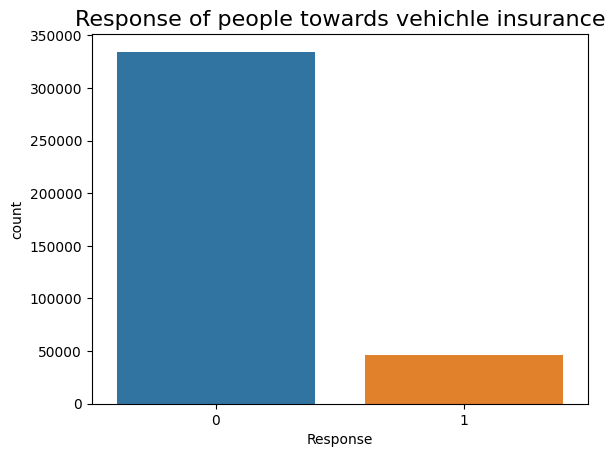

In [ ]:
# Count plot of dependent variable

sns.countplot(x=df['Response'])
plt.title('Response of people towards vehichle insurance', size =16)
plt.show()


##### 1. Why did you pick the specific chart?

##### Answer - I chose this because a Seaborn countplot is ideal for visually highlighting the differences between two values of a variable.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - Most people choose not to buy vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Answer - The plot reveals a small customer base that prefers purchasing vehicle insurance, indicating a negative impact on the business.

#### Chart - 2

## **Let's check which gender was more interested in subscribing to Vehicle Insurance.**

Text(0.5, 1.0, 'Gender response towards vehichle insurance')

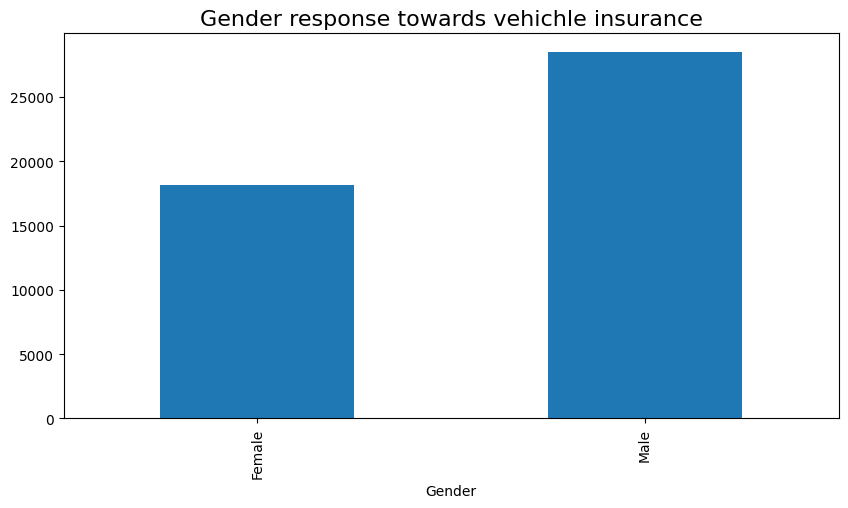

In [ ]:
# Grouping the gender with response
df_gender = df.groupby('Gender').sum()['Response']
# Plotting
df_gender.plot(kind = 'bar',subplots= True ,figsize=(10,5))
plt.title('Gender response towards vehichle insurance',size = 16)


##### 1. Why did you pick the specific chart?

##### Answer - I chose this because a bar chart from the matplotlib library is a useful way to visually represent the proportions of different values within a variable.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - The bar chart indicates that there was a greater level of interest among males in subscribing to Vehicle Insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The bar chart indicates that there was a greater level of interest among males in subscribing to Vehicle Insurance.

#### Chart - 3

### **Let's check customers of which age are in majority**

<Axes: xlabel='Age', ylabel='Density'>

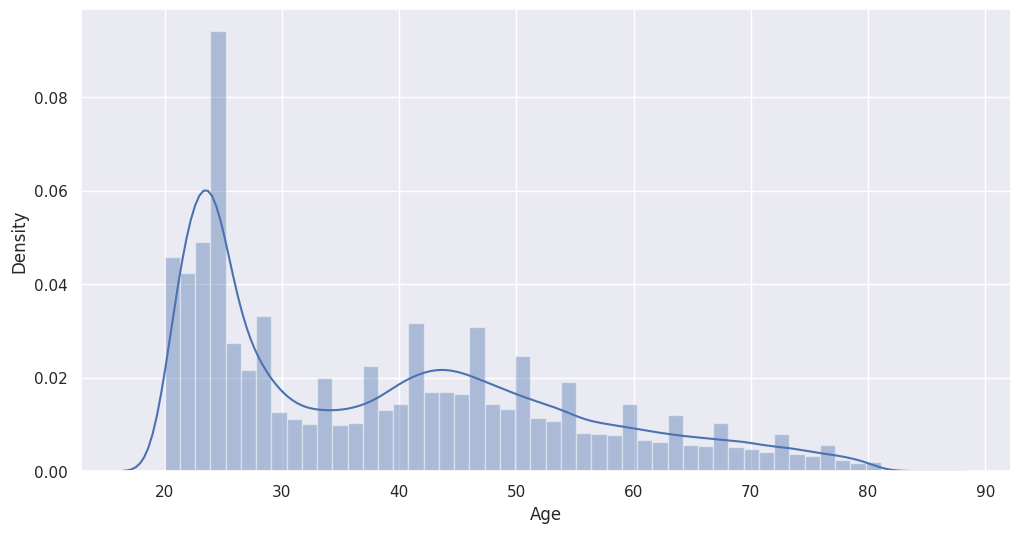

In [ ]:
#visualization on the basis of Age column
sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(df['Age'])

##### 1. Why did you pick the specific chart?

##### Answer - I chose this chart because the distplot, or distribution plot, visually represents the spread and pattern of continuous data variables. It provides an overview of the data distribution using Seaborn's distplot function.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - Based on the plot, it is evident that the age range of 22-25 has the highest number of customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Answer - The majority of responses received are from the age groups 22-25, suggesting that targeting these age groups can contribute to business growth.

#### Chart - 4

## **Let's check people of which age group are more intrested**

array([<Axes: xlabel='Age_Group'>], dtype=object)

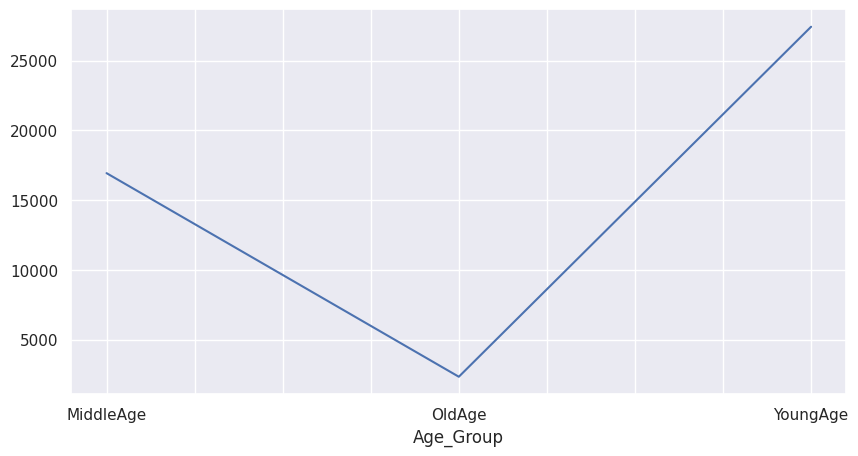

In [ ]:
# Grouping age column with response column
df_group = df.groupby('Age_Group').sum()['Response']

# plotting the result
df_group.plot(kind = 'line' , subplots = True, figsize = (10,5))

##### 1. Why did you pick the specific chart?

##### Answer - I chose Line plot because it is useful for showing how a variable changes in relation to another variable.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - The analysis reveals a notable inclination among young individuals towards vehicle insurance, while comparatively lower interest is observed among older age groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Answer - The higher interest in vehicle insurance from the young age group, combined with their larger population representation in a country, is a positive outcome.

#### Chart - 5

## **Let's check how many customers are high premium subscribers**

<Axes: xlabel='High_premium', ylabel='count'>

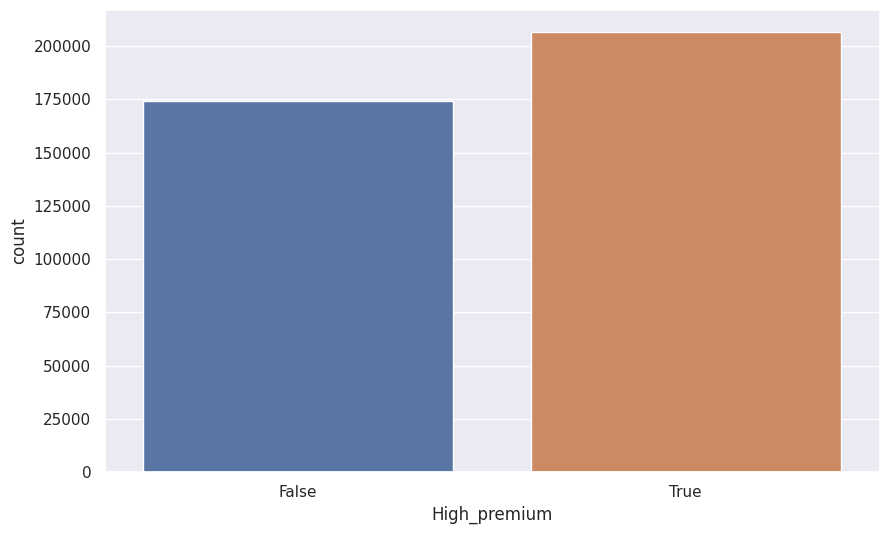

In [ ]:
# count of high premium subscribers
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x=df['High_premium'])

##### 1. Why did you pick the specific chart?

##### Answer - I chose this because a Seaborn countplot is ideal for visually highlighting the differences between two values of a variable.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - Based on the plot, it is clear that individuals tend to prefer higher-end premiums over lower-end options.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Answer - The plot indicates that customers who selected vehicle insurance are more inclined towards choosing expensive premium options. This is a positive aspect for the business as it contributes to increased revenue generation.

#### Chart - 6

## **Let's count age wise subscription of vehicle insurance**

array([<Axes: title={'center': 'Response'}, xlabel='Age'>], dtype=object)

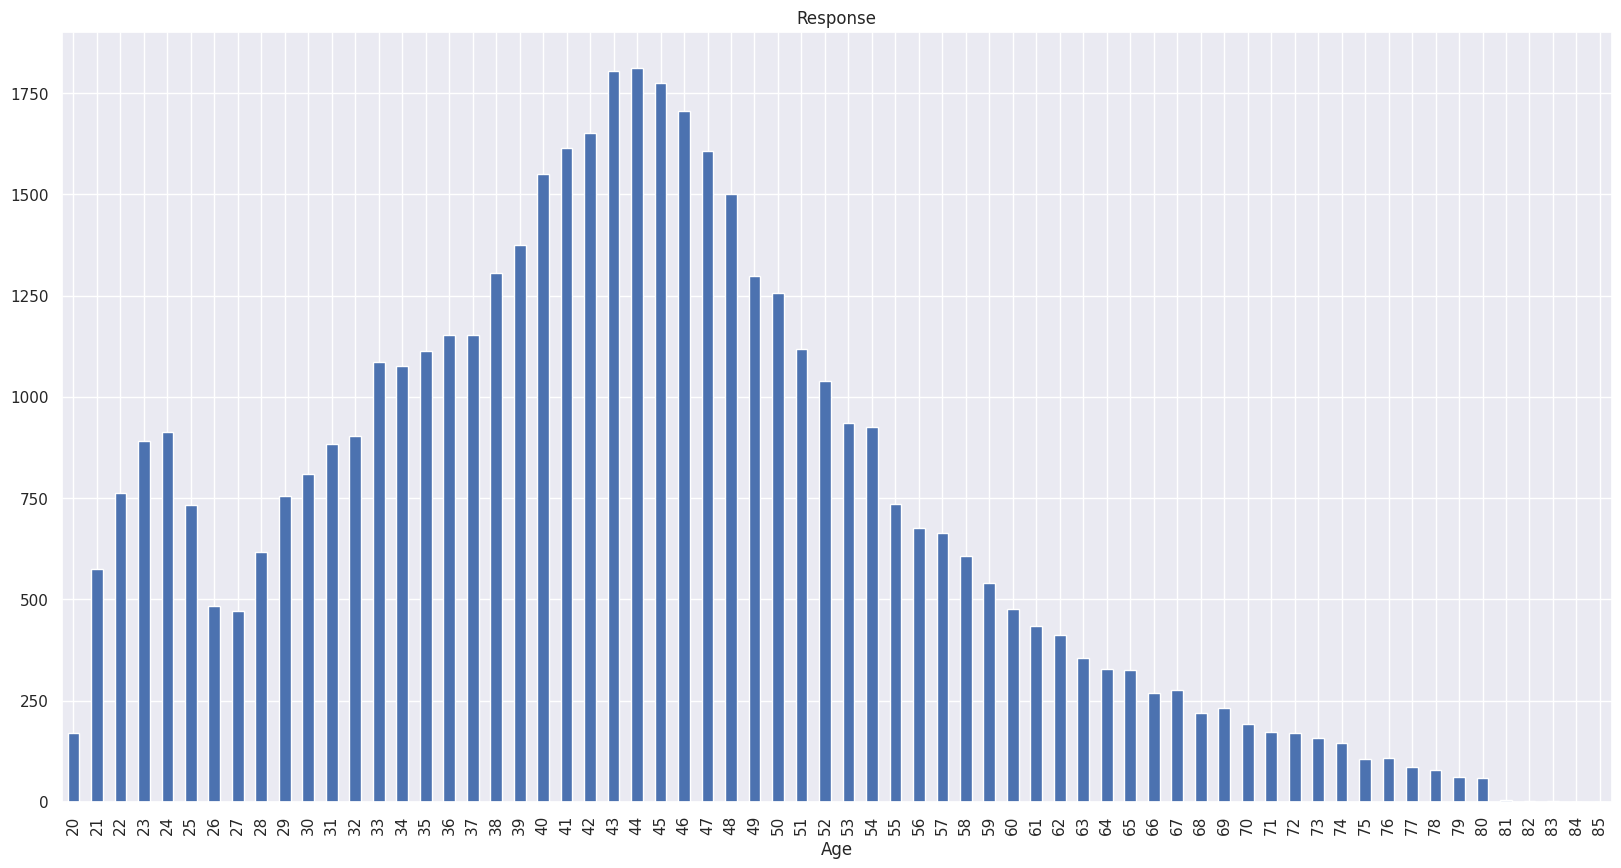

In [ ]:
# Age wise plotting of graph
df_age = df.groupby('Age').sum()['Response']
#plotting the result
df_age.plot(kind='bar', subplots = True , figsize=(20,10))

##### 1. Why did you pick the specific chart?

##### Answer - I chose this because a bar chart from the matplotlib library is a useful way to visually represent the proportions of different values within a variable.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - The plot clearly shows that there is a significant level of interest and response regarding Vehicle Insurance within the age range of 40 to 48.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Answer - We can observe that there is a considerable number of positive responses from the age groups above 40 to 48. Furthermore, it is noticeable that there is a consistent upward trend starting from the age of 28.

#### Chart - 7

## **Let's check non subscribers (age - wise)**

array([<Axes: title={'center': 'Age'}>], dtype=object)

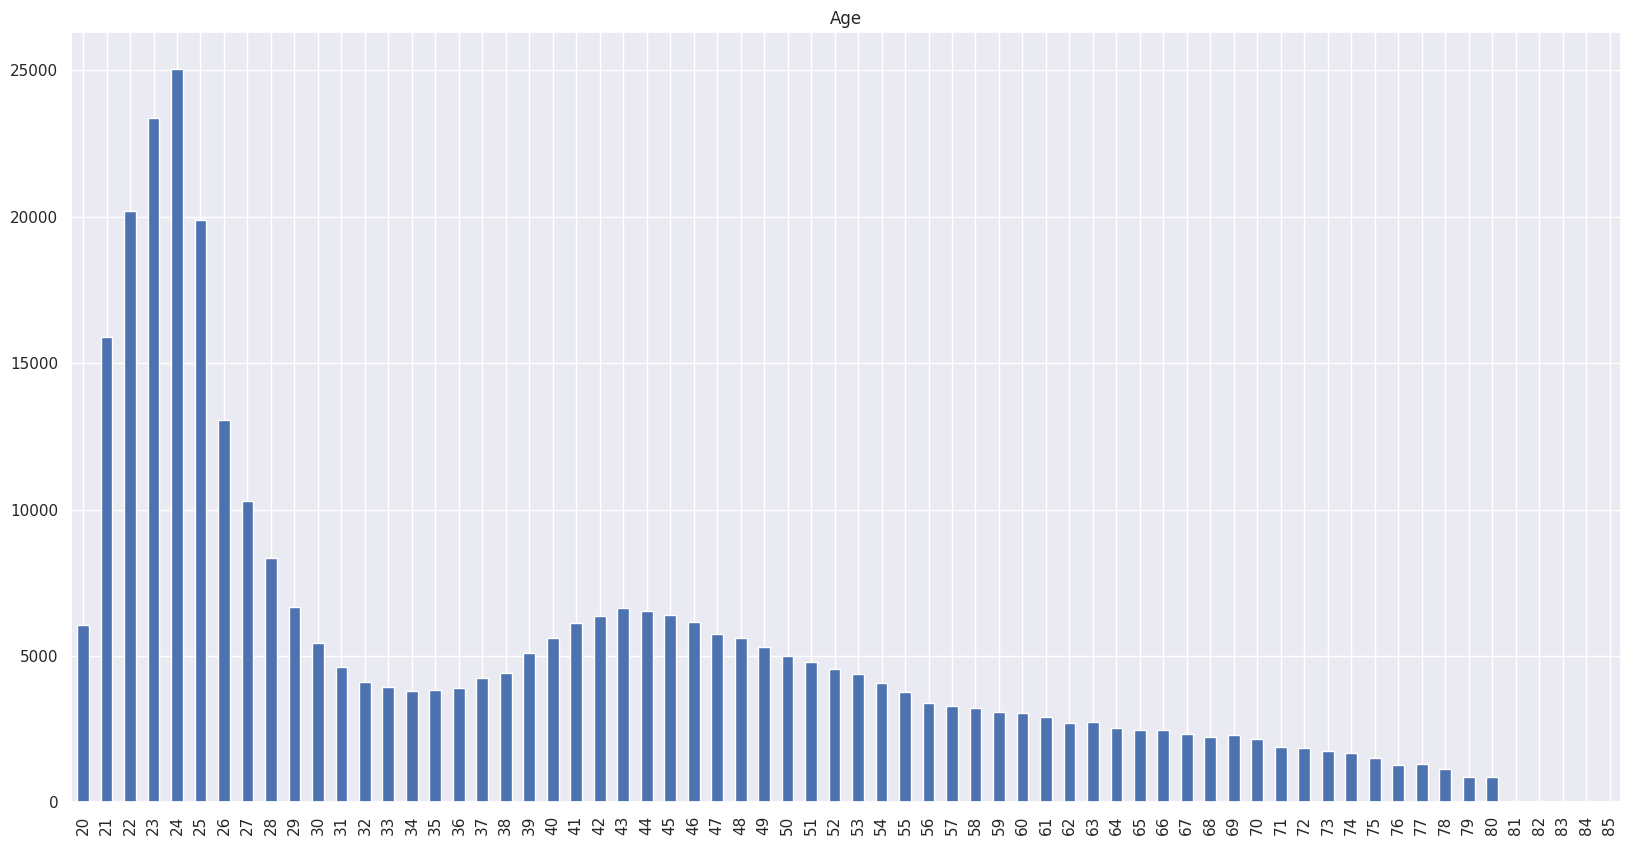

In [ ]:
# code to find non-subscribers (age wise)
df_age = df[df['Response']==0]['Age'].value_counts().sort_index()
#plotting the result
df_age.plot(kind = 'bar', subplots = True , figsize=(20,10))

##### 1. Why did you pick the specific chart?

##### Answer - I chose this because a bar chart from the matplotlib library is a useful way to visually represent the proportions of different values within a variable.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - The plot clearly shows that there is a noticeable number of negative responses regarding Vehicle Insurance within the age groups of 21 to 25.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Answer - It appears that the age groups 21 to 25 have shown less interest in vehicle insurance. This could be due to reasons such as not having a driver's license or lacking awareness about the importance of insurance. It's important to note that this is not necessarily a negative impact, as they are still potential customers who may consider vehicle insurance in the future.

#### Chart - 8

## **Let's check number of responses by people who are previously insured and not insured**

In [ ]:
# value count of previously insured
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [ ]:
#Grouping positive responses with previously insured customers
df_pre_insured = df[df['Response']==1].groupby('Previously_Insured').count()['Response']
df_pre_insured

Previously_Insured
0    46552
1      158
Name: Response, dtype: int64

array([<Axes: ylabel='Response'>], dtype=object)

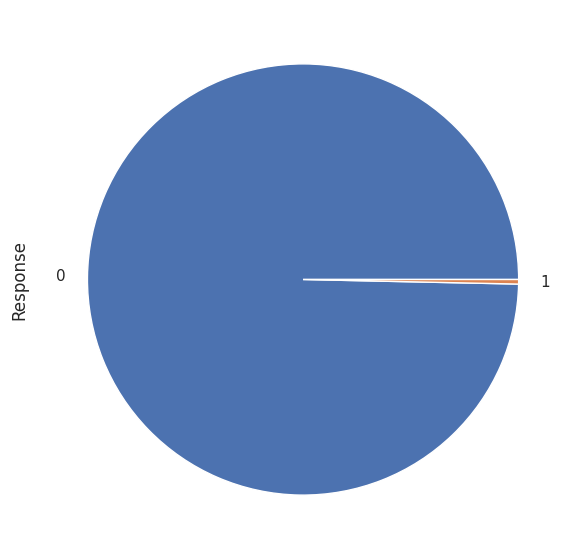

In [ ]:
# Plotting the pie chart
df_pre_insured.plot(kind = 'pie', subplots = True , figsize=(7,7))

##### 1. Why did you pick the specific chart?

##### Answer - I chose pie chart, which is created using the Matplotlib library, is a useful tool for visually representing the proportion or distribution of different values within a variable.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - The Pie Chart illustrates the distribution of responses among individuals based on their previous insurance status. It indicates that people who do not have prior insurance coverage tend to overwhelmingly choose to opt in for vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Answer - By observing the Pie Chart, the company can identify an opportunity to specifically target customers who do not have previous vehicle insurance. These customers are more likely to be open to considering and opting in for vehicle insurance. Therefore, the company can focus its efforts on actively reaching out to this particular group of customers.

#### Chart - 9

## **Let's check the customer's subscription prices**

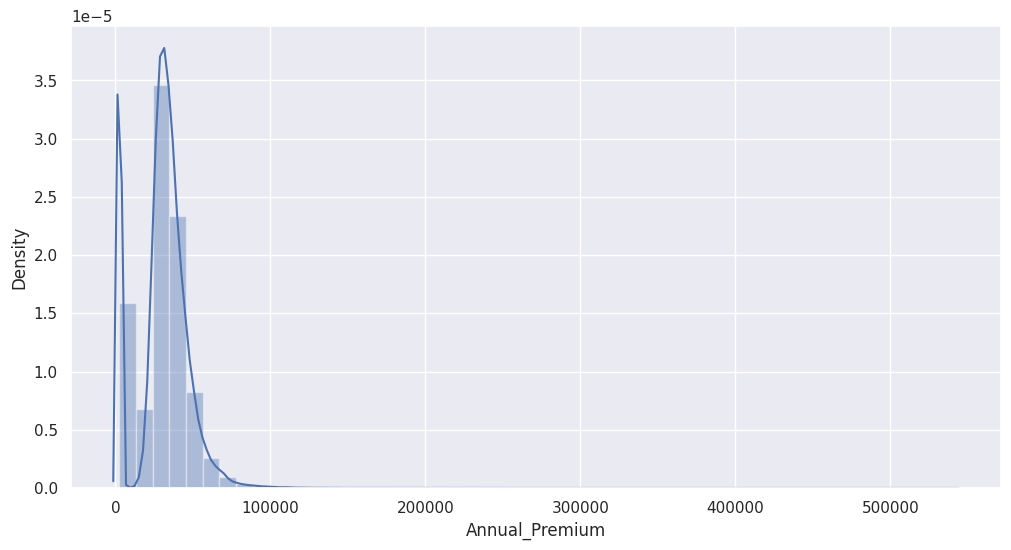

<Figure size 1200x600 with 0 Axes>

In [ ]:
# code for distribution of annual premium
sns.distplot(df["Annual_Premium"])
plt.figure(figsize = (12,6))
plt.show()

##### 1. Why did you pick the specific chart?

##### Answer - I chose a distribution plot beacause it is a visual representation that shows how data is distributed or spread out. It is particularly useful for continuous data variables.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - The majority of customers tend to have subscription prices that are centered around $50,000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Answer - The plot indicates that customers who chose vehicle insurance are more inclined towards higher premium options. This is advantageous for the business as it leads to increased revenue.

#### Chart - 10

## **Let's check response from customers**

In [ ]:
df['Vintage'].value_counts()

256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: Vintage, Length: 290, dtype: int64

<Axes: ylabel='Response'>

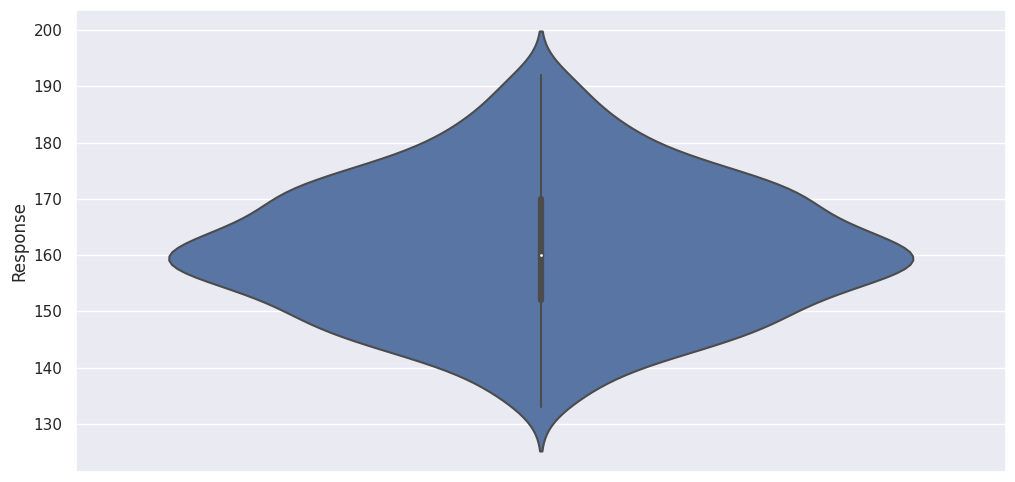

In [ ]:
df_vintage = df[df['Response']==1].groupby('Vintage').count()['Response']
# Violin plot for vintage
sns.violinplot(y=df_vintage)

##### 1. Why did you pick the specific chart?

##### Answer - Violin plots are a type of visual representation similar to box plots. However, they provide additional information by displaying the probability density of the data at different values.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - The violin plot indicates that there is a higher frequency of positive responses from customers who have been loyal for 150 or more days. However, the positive response rate decreases after the 180-day mark, suggesting a decline in customer satisfaction or engagement beyond this period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Answer - To enhance customer loyalty and engagement, the company can strategically extend the tenure of a customer by providing special offers or incentives once they have reached an average of 180 days. By recognizing this milestone, the company can encourage customers to continue their association and foster long-term relationships.

#### Chart - 11

## **Let's check the positive responses from the customers across all the regions**

array([<Axes: xlabel='Region_Code'>], dtype=object)

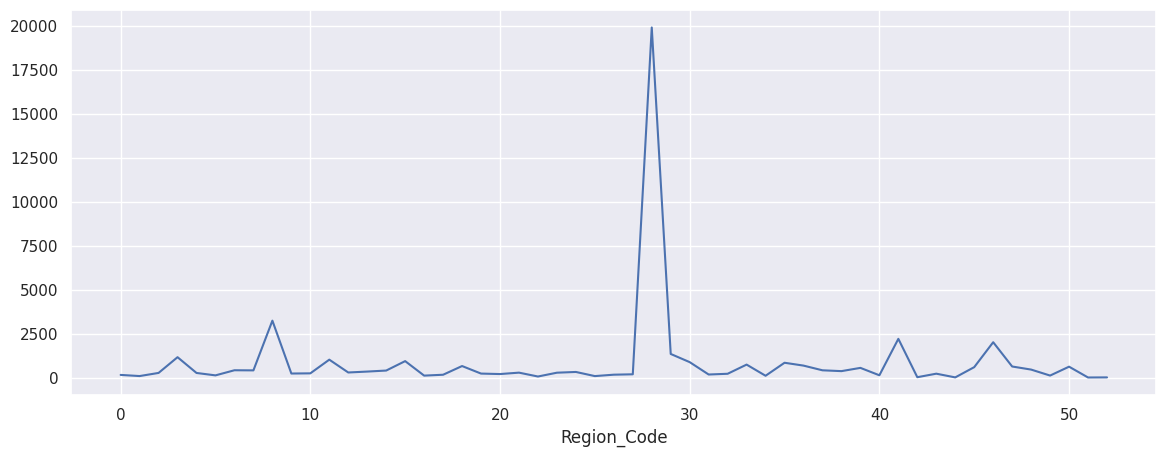

In [ ]:
# grouping
df_region = df.groupby('Region_Code').sum()['Response']

# Plotting the response
df_region.plot(kind='line', subplots = True , figsize = (14,5) )

##### 1. Why did you pick the specific chart?

##### Answer - I chose Line plot because it is useful for showing how a variable changes in relation to another variable.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - This line graph represents the favorable feedback received from customers in various regions. The data shows that Area code 28 received the highest number of positive responses, followed by codes 8 and 46.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Answer - The company should pay close attention to area codes 28, 8, and 46 as these regions hold great potential for selling vehicle insurance.

#### Chart - 12

## **Histogram of all the features**


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Driving_License'}>],
       [<Axes: title={'center': 'Region_Code'}>,
        <Axes: title={'center': 'Previously_Insured'}>,
        <Axes: title={'center': 'Annual_Premium'}>],
       [<Axes: title={'center': 'Policy_Sales_Channel'}>,
        <Axes: title={'center': 'Vintage'}>,
        <Axes: title={'center': 'Response'}>]], dtype=object)

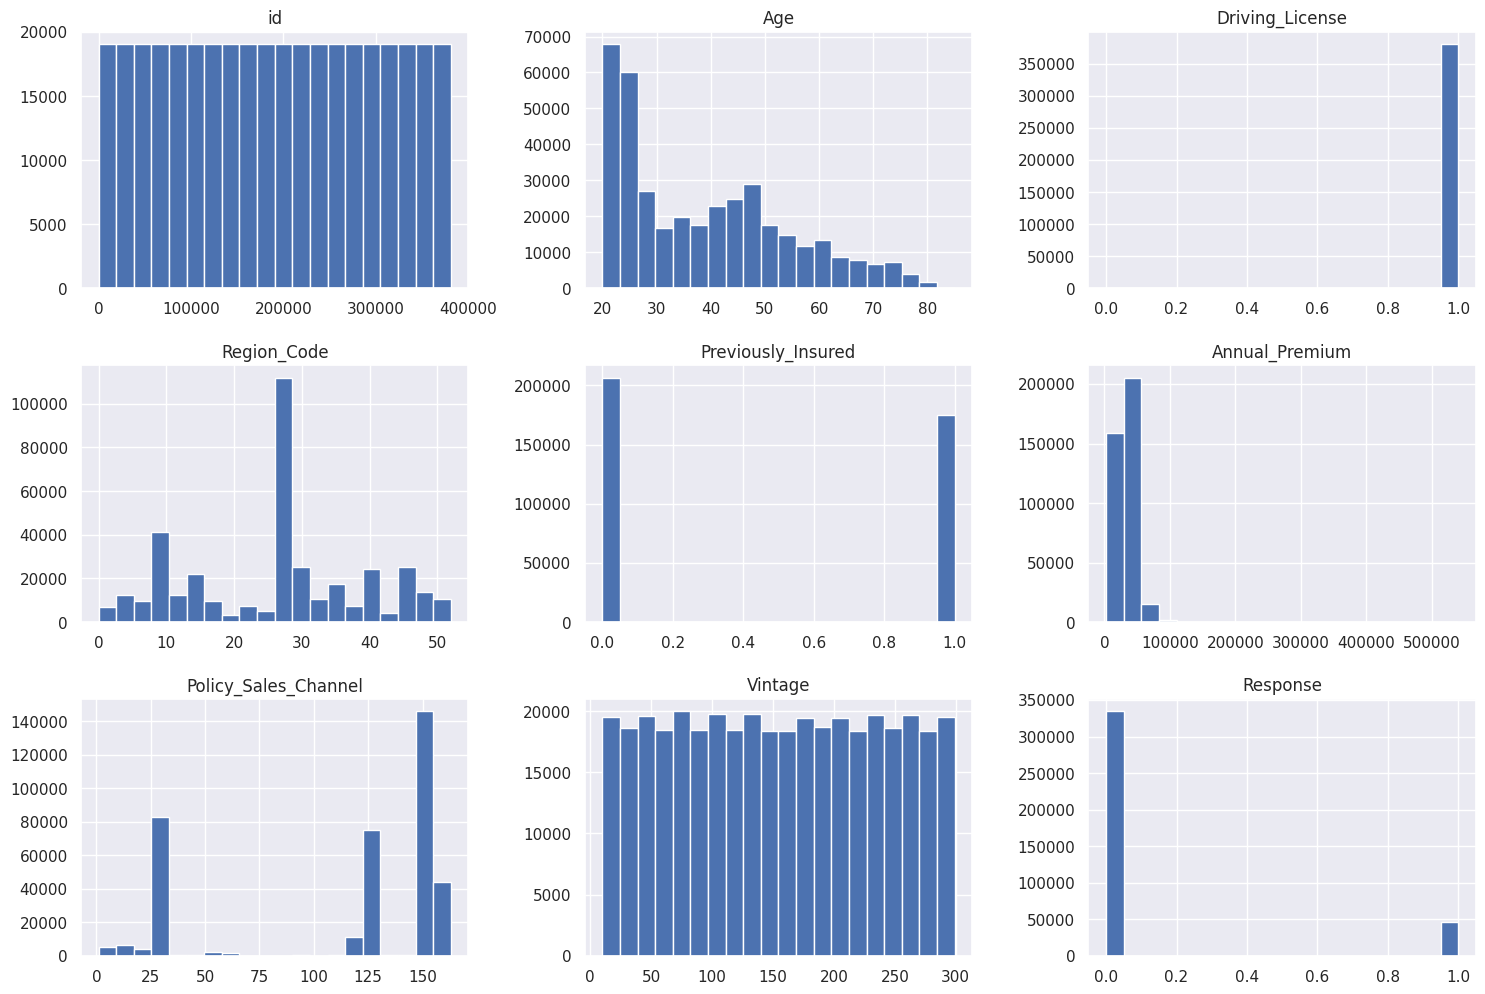

In [ ]:
# Code for histogram
df.hist(bins = 20 , figsize = (18,12))

##### 1. Why did you pick the specific chart?

##### Answer - A histogram, created using the matplotlib library, is a useful tool for visualizing the distribution of values for a specific variable.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - This provides a visual representation of how the values are spread across all the columns in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Answer - This shows how the values are divided or spread out within each column of the dataset.

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group,Low_premium,High_premium
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,YoungAge,False,True
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,OldAge,False,True
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,MiddleAge,False,True
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,YoungAge,True,False
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,YoungAge,True,False


In [ ]:
# creating copy to keep original data safe
df_new = df.copy()

# droping the low premium cloumn
df_new.drop(columns = (['Low_premium']), inplace= True)

In [ ]:
# Converting the 'High_premium' column to string data type
df_new['High_premium'] = df_new['High_premium'].astype(str)

In [ ]:
# Perform one-hot encoding on categorical columns using pandas get_dummies function
df_new = pd.get_dummies(df_new,drop_first= False)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     381109 non-null  int64  
 1   Age                    381109 non-null  int64  
 2   Driving_License        381109 non-null  int64  
 3   Region_Code            381109 non-null  float64
 4   Previously_Insured     381109 non-null  int64  
 5   Annual_Premium         381109 non-null  float64
 6   Policy_Sales_Channel   381109 non-null  float64
 7   Vintage                381109 non-null  int64  
 8   Response               381109 non-null  int64  
 9   Gender_Female          381109 non-null  uint8  
 10  Gender_Male            381109 non-null  uint8  
 11  Vehicle_Age_1-2 Year   381109 non-null  uint8  
 12  Vehicle_Age_< 1 Year   381109 non-null  uint8  
 13  Vehicle_Age_> 2 Years  381109 non-null  uint8  
 14  Vehicle_Damage_No      381109 non-nu

#### Chart - 13

## **Correlation Heatmap**

## MULTICOLLINEARITY

<Axes: >

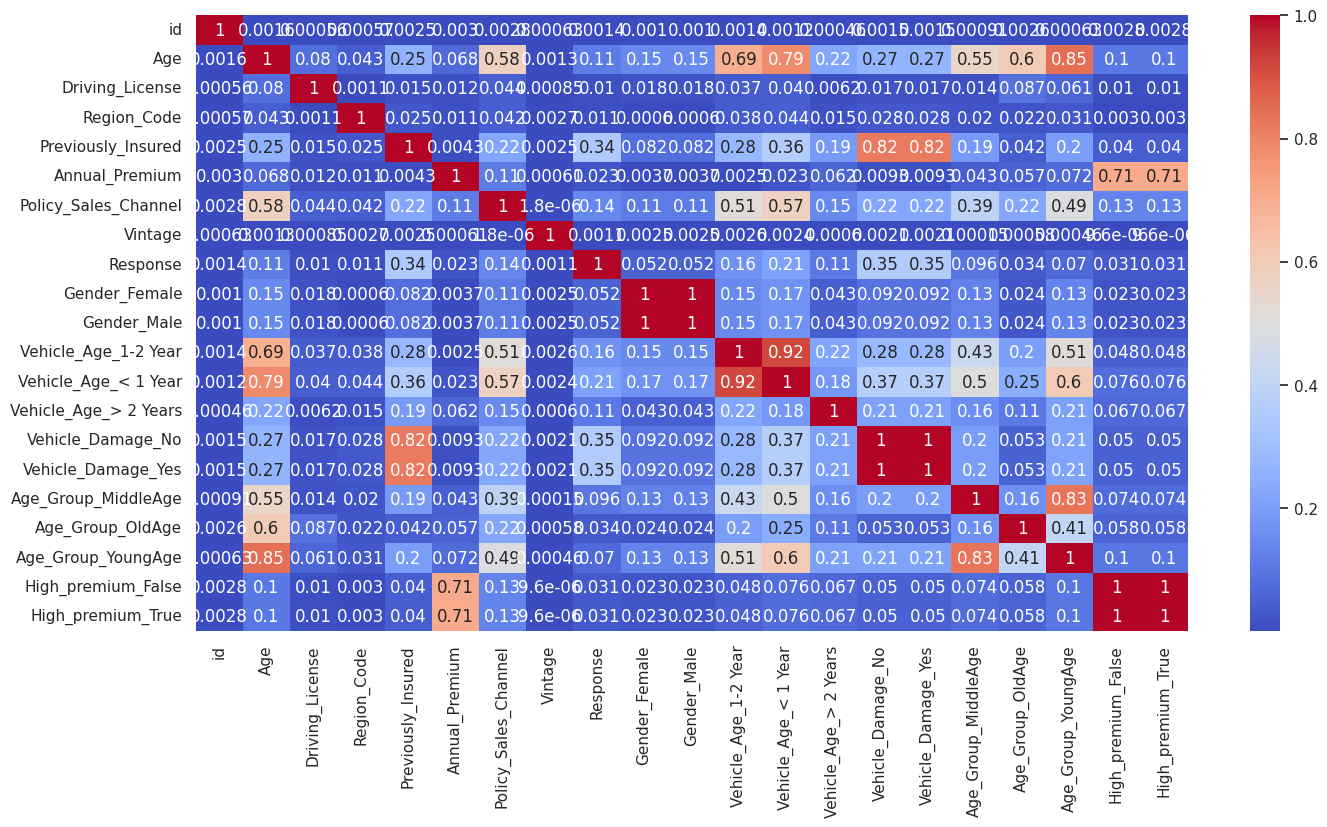

In [ ]:
# Creating a figure with a specific size
plt.figure(figsize=(16, 8))

# Compute the correlation matrix
correlation = df_new.corr()

# Creating a heatmap
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')


In [ ]:
# Calculatig the multicollinearity of all columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,1.000035
1,Age,12.015084
2,Driving_License,1.009566
3,Region_Code,1.002985
4,Previously_Insured,3.158318
5,Annual_Premium,2.007728
6,Policy_Sales_Channel,1.621293
7,Vintage,1.000037
8,Gender_Female,inf
9,Gender_Male,inf


In [ ]:
df_new.drop(columns = (['Gender_Female']) , inplace =True)

In [ ]:
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,1.000035
1,Age,12.015084
2,Driving_License,1.009566
3,Region_Code,1.002985
4,Previously_Insured,3.158318
5,Annual_Premium,2.007728
6,Policy_Sales_Channel,1.621293
7,Vintage,1.000037
8,Gender_Male,1.033034
9,Vehicle_Age_1-2 Year,inf


In [ ]:
df_new.drop(columns = (['Vehicle_Age_> 2 Years']) , inplace =True)

In [ ]:
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,1.000035
1,Age,12.015084
2,Driving_License,1.009566
3,Region_Code,1.002985
4,Previously_Insured,3.158318
5,Annual_Premium,2.007728
6,Policy_Sales_Channel,1.621293
7,Vintage,1.000037
8,Gender_Male,1.033034
9,Vehicle_Age_1-2 Year,6.719387


In [ ]:
df_new.drop(columns = (['Vehicle_Damage_No']) , inplace =True)

In [ ]:
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,1.000035
1,Age,12.015084
2,Driving_License,1.009566
3,Region_Code,1.002985
4,Previously_Insured,3.158318
5,Annual_Premium,2.007728
6,Policy_Sales_Channel,1.621293
7,Vintage,1.000037
8,Gender_Male,1.033034
9,Vehicle_Age_1-2 Year,6.719387


In [ ]:
df_new.drop(columns = (['Age_Group_YoungAge']) , inplace =True)

In [ ]:
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,1.000035
1,Age,12.015084
2,Driving_License,1.009566
3,Region_Code,1.002985
4,Previously_Insured,3.158318
5,Annual_Premium,2.007728
6,Policy_Sales_Channel,1.621293
7,Vintage,1.000037
8,Gender_Male,1.033034
9,Vehicle_Age_1-2 Year,6.719387


In [ ]:
df_new.drop(columns = (['High_premium_True']) , inplace =True)

In [ ]:
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.981242
1,Age,74.287934
2,Driving_License,115.480334
3,Region_Code,4.961690
4,Previously_Insured,5.767067
5,Annual_Premium,8.155934
6,Policy_Sales_Channel,8.381157
7,Vintage,4.378376
8,Gender_Male,2.243282
9,Vehicle_Age_1-2 Year,13.406468


In [ ]:
df_new.drop(columns = (['Driving_License']) , inplace =True)

In [ ]:
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.923164
1,Age,39.765730
2,Region_Code,4.857675
3,Previously_Insured,5.567917
4,Annual_Premium,7.635699
5,Policy_Sales_Channel,7.788119
6,Vintage,4.303918
7,Gender_Male,2.232667
8,Vehicle_Age_1-2 Year,11.314843
9,Vehicle_Age_< 1 Year,10.225636


#####These columns are the remaining variables in the dataset after removing highly correlated variables.

In [ ]:
df_new.drop(columns = (['Age']) , inplace =True)

In [ ]:
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.832459
1,Region_Code,4.680012
2,Previously_Insured,5.255917
3,Annual_Premium,6.813024
4,Policy_Sales_Channel,7.687955
5,Vintage,4.190428
6,Gender_Male,2.199440
7,Vehicle_Age_1-2 Year,8.858380
8,Vehicle_Age_< 1 Year,10.176615
9,Vehicle_Damage_Yes,5.339603


<Axes: >

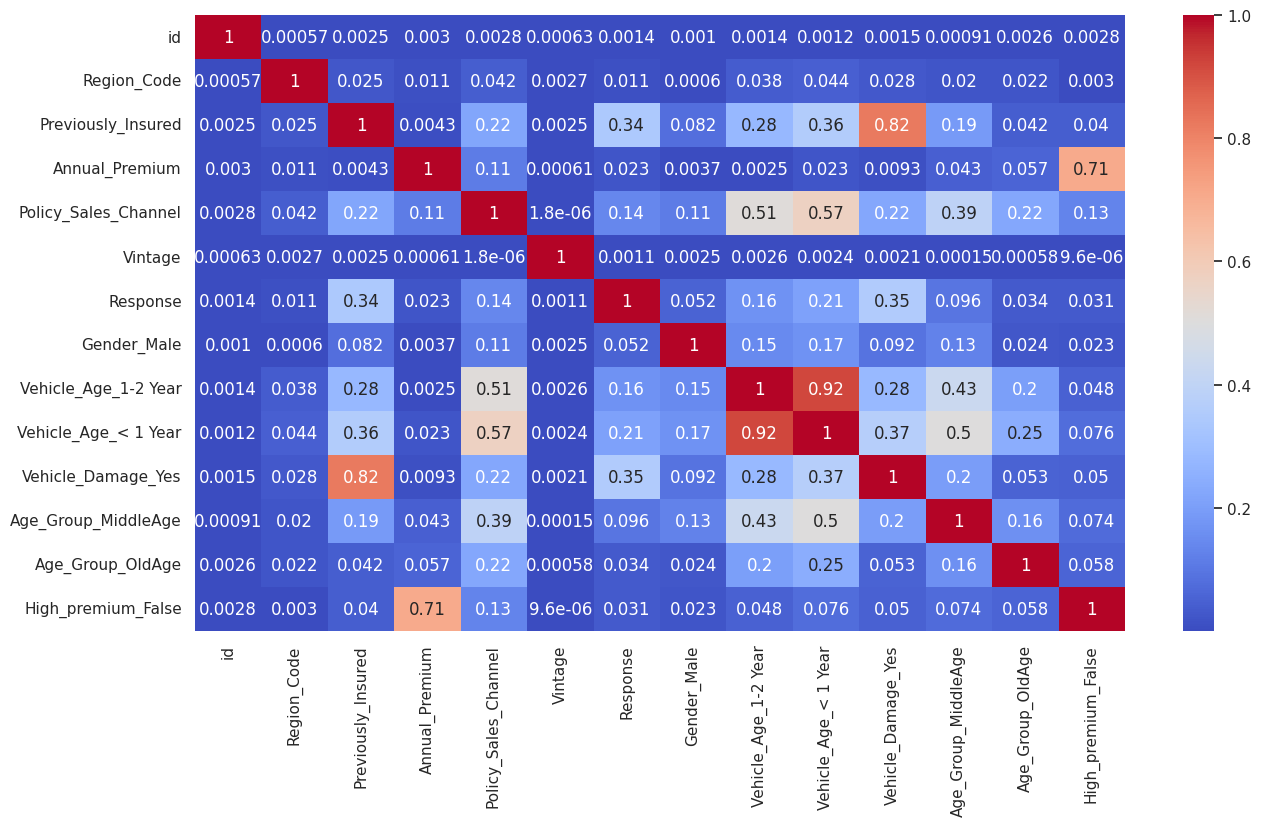

In [ ]:
# Correlation
plt.figure(figsize=(15,8))
correlation = df_new.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

##### Answer - I chose this beacuse a correlation plot visually represents the relationships between variables in a dataset. It displays the correlation of each variable with itself and with other columns using a heatmap of colors.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - After dropping the columns whose VIF scores are higher than 10, we plotted the correlation heatmap plot to visualize ideal multicollenearity among the columns.

## Chart 14 - Pair Plot

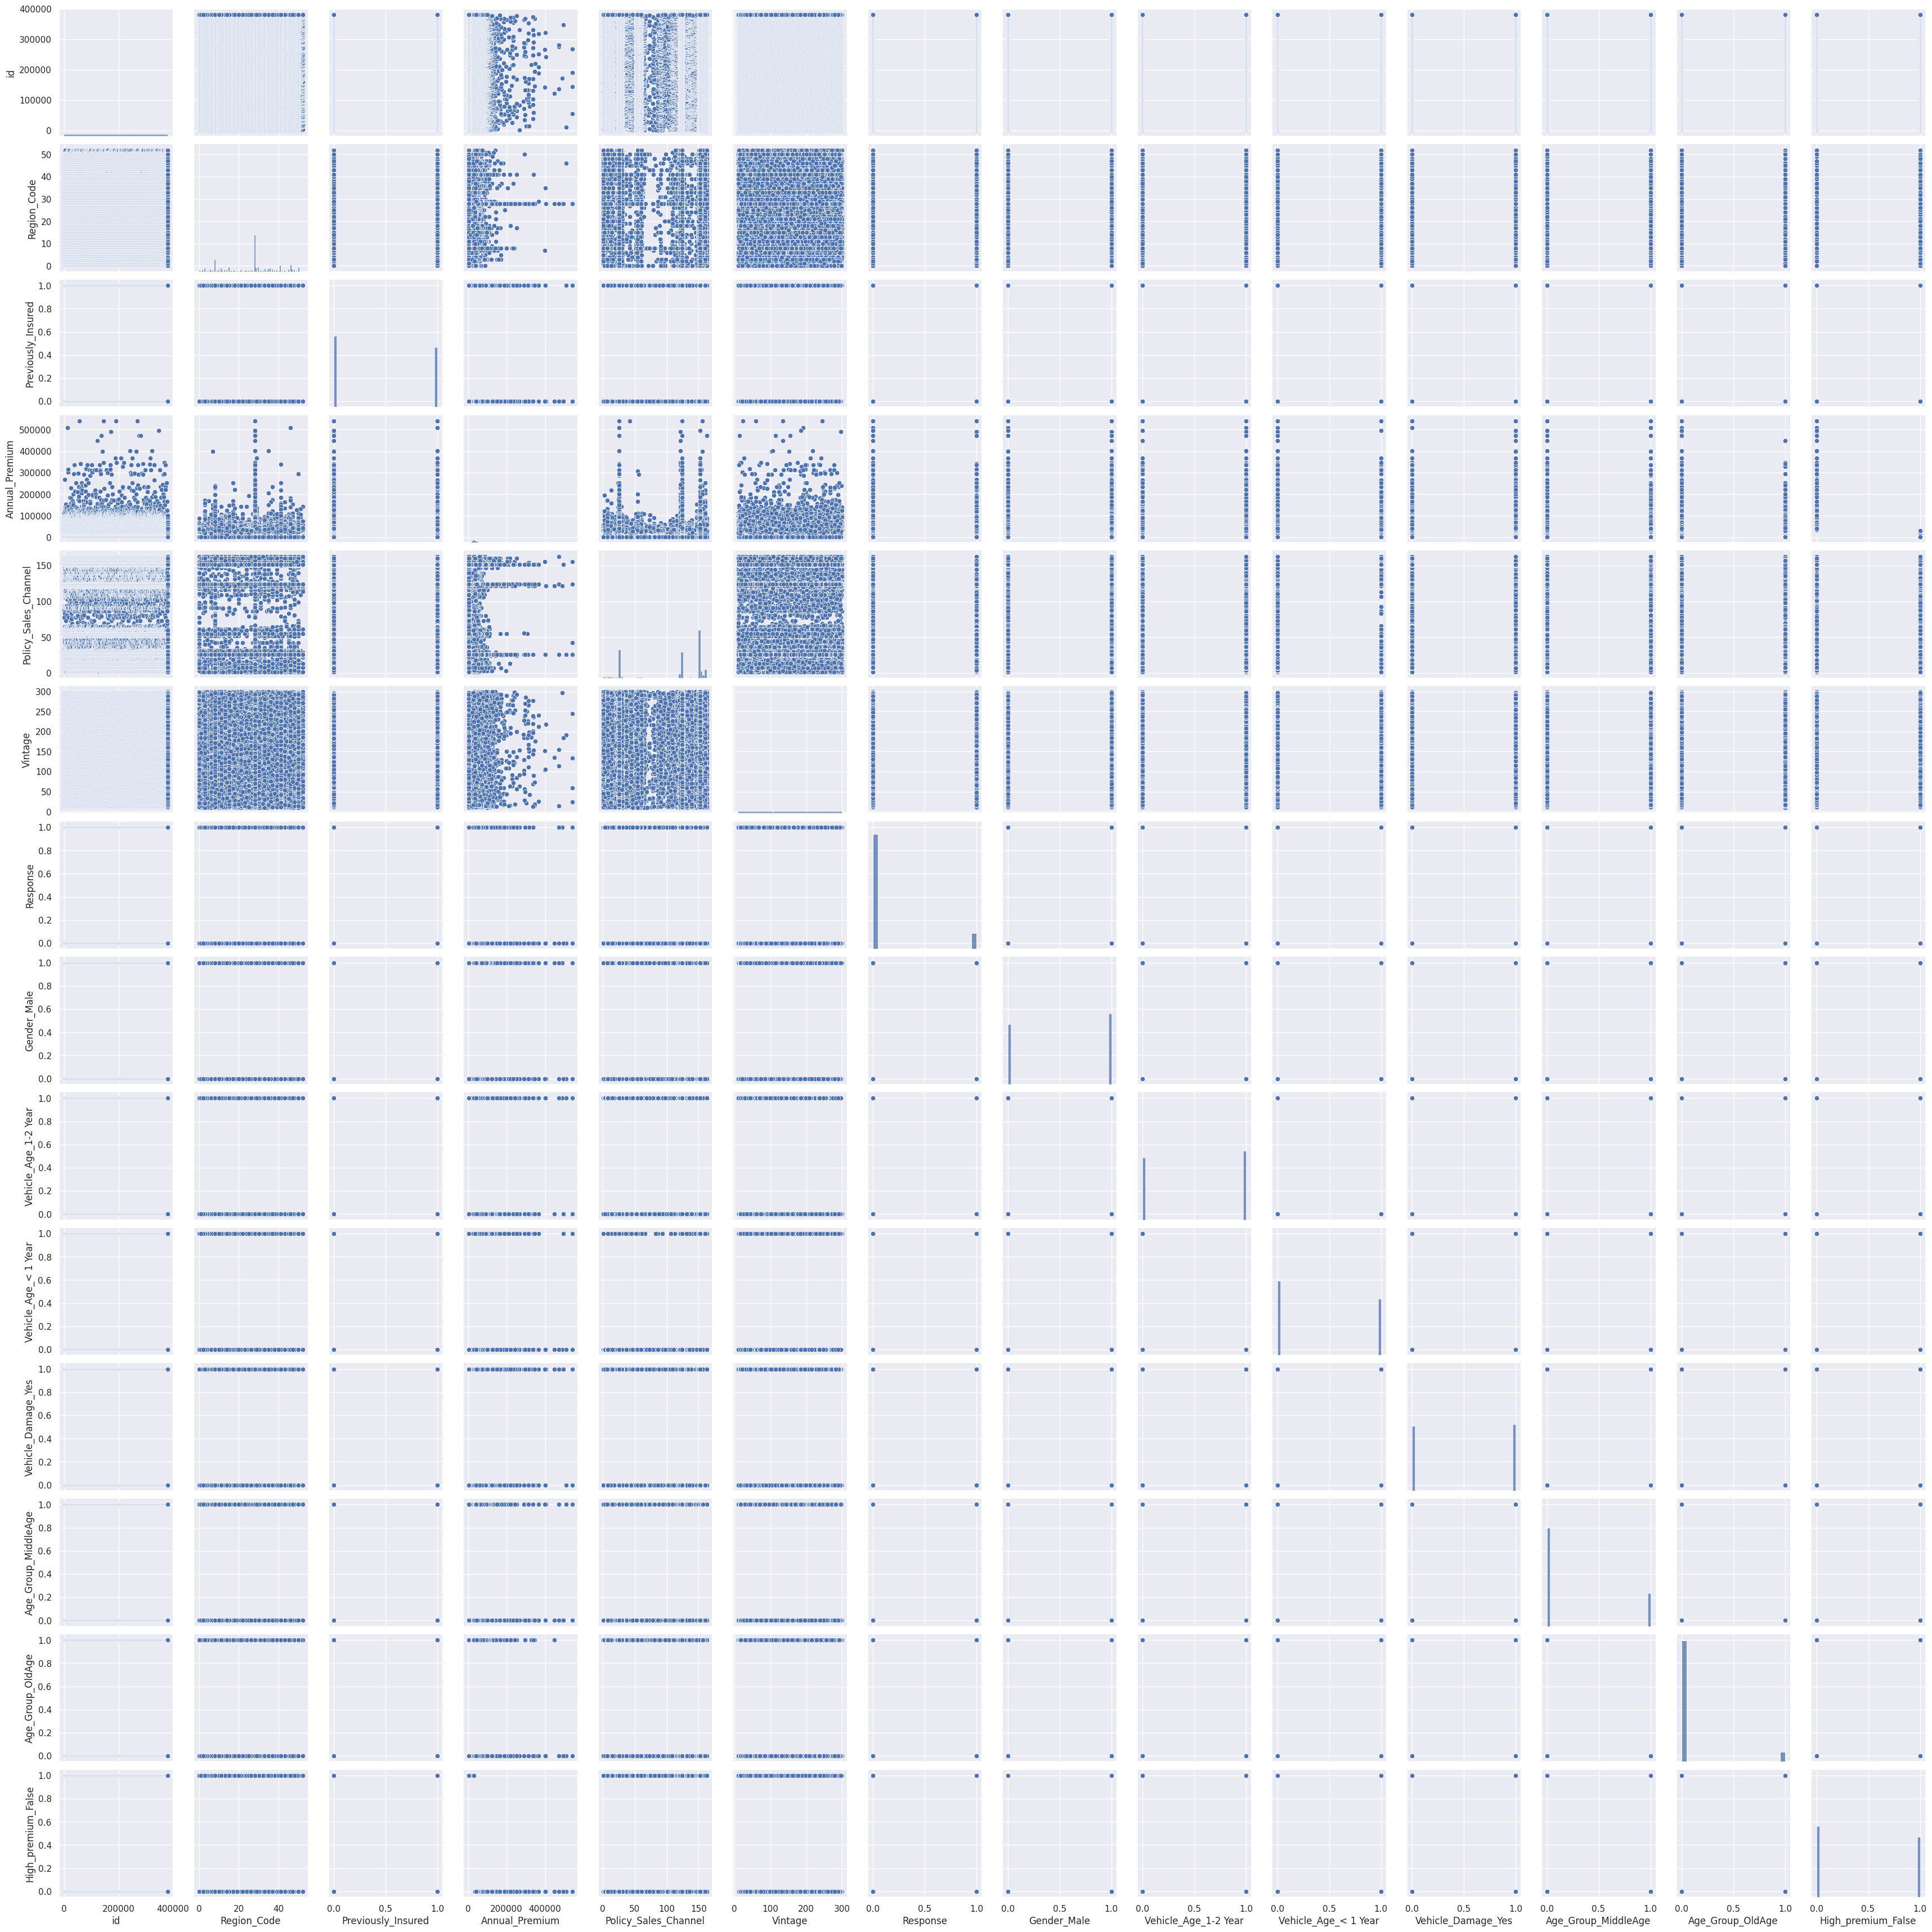

In [ ]:
# Creating a pairplot to visualize pairwise relationships in the DataFrame
sns.pairplot(df_new)

##### 1. Why did you pick the specific chart?

##### Answer - The Seaborn Pairplot is a useful tool for visualizing relationships between variables in a dataset. This makes it easier to interpret and understand the data, as it condenses a large amount of information into a single figure.

##### 2. What is/are the insight(s) found from the chart?


##### Answer - By generating scatterplots the Pairplot function in Seaborn allowed us to visually explore and understand the relationships between different columns in the dataset.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

### HYPOTHESIS : **Males are more interested in buying vehicle insurance.**



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer -
***Null Hypothesis:*** No, Males aren't more interested in buying Vehicle Insurance

***Alternative Hypothesis:*** Yes, Males are more interested in buying Vehicle Insurance

#### 2. Perform an appropriate statistical test.

In [ ]:
hypo_data = pd.crosstab(df['Response'], df['Gender'], margins=False)
hypo_data

Gender,Female,Male
Response,,
0,156835,177564
1,18185,28525


### **Set significance level to 0.05.**

In [ ]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

In [ ]:
p

7.665800628415621e-230

### The p value is smaller than significance level. So, we will reject the null hypothesis and accept the alternative hypothesis.

##### Which statistical test have you done to obtain P-Value?

##### Answer - We used the Chi-Square contingency test to determine the statistical significance (p-value) of our hypothesis.

##### Why did you choose the specific statistical test?

##### Answer - The Chi-Square contingency test serves as a basis for statistical inference, allowing us to investigate the relationship between variables based on the observed data. By applying this test, we can determine whether there is a significant association between the variables of interest.

### Hypothetical Statement - 2

### HYPOTHESIS : **As the number of days a customer is associated with the company increase, the chances that the customer will opt in for vehicle insurance increases.**



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer -

***Null Hypothesis:*** No, As the number of days a customer is associated with the company increase, the customer isn't likely to purchase the vehicle insurance

***Alternative Hypothesis:*** Yes, As the number of days a customer is associated with the company increase, the customer is more likely to purchase the vehicle insurance.

#### 2. Perform an appropriate statistical test.

In [ ]:
hypo_data = pd.crosstab(df['Response'], df['Vintage'], margins=False)
hypo_data

Vintage,10,11,12,13,14,15,16,17,18,19,...,290,291,292,293,294,295,296,297,298,299
Response,,,,,,,,,,,,,,,,,,,,,
0,1164,1153,1092,1145,1104,1146,1141,1130,1098,1075,...,1112,1154,1203,1166,1122,1118,1146,1142,1198,1114
1,147,191,165,184,156,149,174,144,148,171,...,157,151,160,159,159,157,156,142,186,169


### **Set significance level to 0.05.**

In [ ]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

In [ ]:
p

0.8862939415964791

### The p value is greater than significance level , we will fail to reject the null hypothesis.

##### Which statistical test have you done to obtain P-Value?

##### Answer - We used the Chi-Square contingency test to determine the statistical significance (p-value) of our hypothesis.

##### Why did you choose the specific statistical test?

##### Answer - The Chi-Square contingency test serves as a basis for statistical inference, allowing us to investigate the relationship between variables based on the observed data. By applying this test, we can determine whether there is a significant association between the variables of interest.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

##### Answer - Since our dataset does not contain any missing values, there is no requirement to address or handle them.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# IQR = interquartile range

def find_outliers_IQR(df_new):

   q1=df_new.quantile(0.25)

   q3=df_new.quantile(0.75)

   IQR=q3-q1

   outliers = df_new[((df_new<(q1-1.5*IQR)) | (df_new>(q3+1.5*IQR)))]

   return outliers

In [ ]:
for col in ['Annual_Premium','Vintage']:
  outliers = find_outliers_IQR(df_new[col])
  print(f"column name is {col}")
  print('number of outliers: '+ str(len(outliers)))

  print('max outlier value: '+ str(outliers.max()))

  print('min outlier value: '+ str(outliers.min()))

  outliers

column name is Annual_Premium
number of outliers: 10320
max outlier value: 540165.0
min outlier value: 61893.0
column name is Vintage
number of outliers: 0
max outlier value: nan
min outlier value: nan


In [ ]:
df_new=df_new[(df_new['Annual_Premium'] < 60090.0)]

<Axes: >

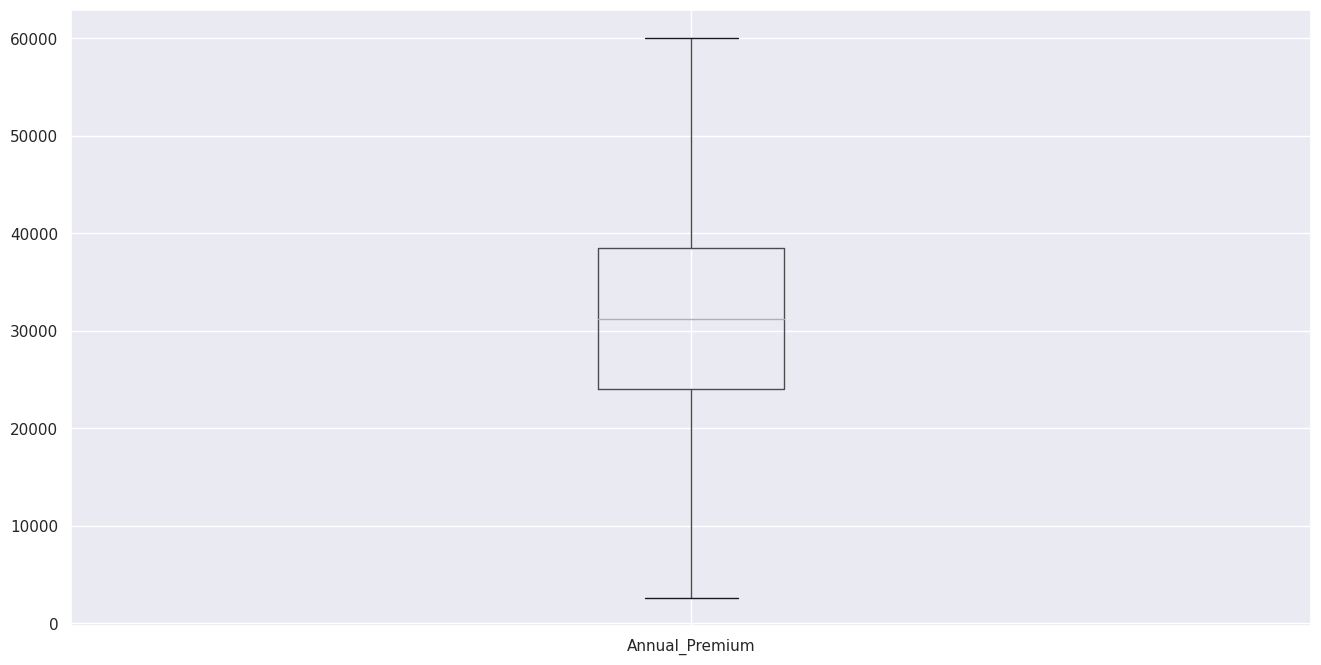

In [ ]:
#plotting boxplot for outlier detection

df_new.boxplot(column = (['Annual_Premium']),figsize=(16,8))

##### What all outlier treatment techniques have you used and why did you use those techniques?

##### Answer - By utilizing boxplots, we visually inspected and addressed outliers in our data using the Inter Quartile Range (IQR) method. This simple and computationally efficient technique proved effective in successfully removing outliers and ensuring the quality of our dataset.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

##### Answer - To enhance the accuracy of our model predictions, we employed the code "df_new = pd.get_dummies(df_new, drop_first=False)" to encode categorical columns and generate dummy variables. This process of creating dummy variables aids in capturing categorical information, thereby improving the predictive performance of the model.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')
# #Splitting the premium based on mean
# df['Low_premium'] = df['Annual_Premium']<= df['Annual_Premium'].mean()
# df['High_premium'] = df['Annual_Premium']> df['Annual_Premium'].mean()

##### We employed above codes for feature manipulation

#### 2. Feature Selection

In [ ]:
df_new.columns

Index(['id', 'Region_Code', 'Previously_Insured', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Gender_Male',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year', 'Vehicle_Damage_Yes',
       'Age_Group_MiddleAge', 'Age_Group_OldAge', 'High_premium_False'],
      dtype='object')

##### What all feature selection methods have you used  and why?

##### Answer - We utilized the VIF (Variance Inflation Factor) to eliminate unnecessary features during the pre-processing stage of modeling, enhancing the model's effectiveness by reducing multicollinearity.

##### Which all features you found important and why?

##### Answer - After encoding the categorical columns and evaluating the VIF (Variance Inflation Factor) scores, we chose all the features that had VIF scores below 10 for further analysis and modeling.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

#### No data transformation is required for our dataset.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

##### Answer - We did not employ dimensionality reduction techniques as the number of variables in our dataset was relatively small and aligned with the desired dimension.

### 8. Data Splitting

In [ ]:
# Creating the data of independent variables
y = df_new['Response']

# Create the dependent variable data
X = df_new.drop(columns=['Response'],axis=1).values

### 9. Handling Imbalanced Dataset

Text(0.5, 1.0, 'Response')

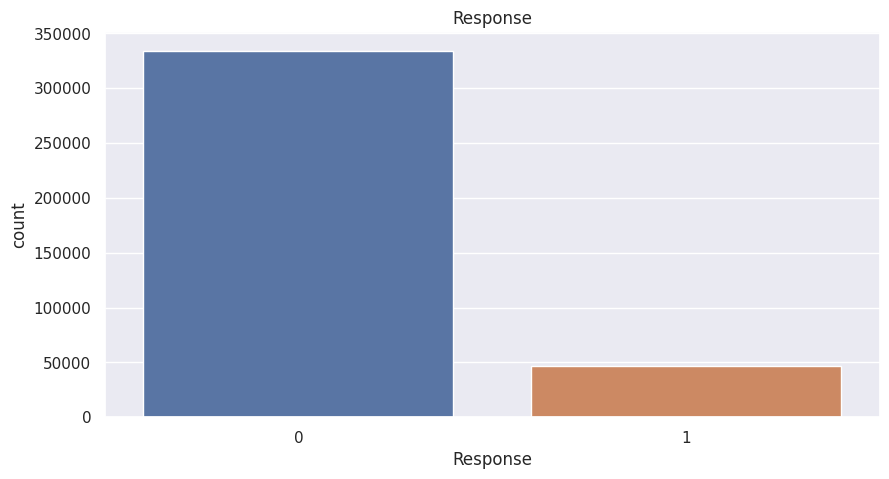

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x=df['Response'])
plt.title('Response')

##### Do you think the dataset is imbalanced? Explain Why.

##### Answer - Based on the observed plot, it is clear that there is a class imbalance issue, with a higher number of values labeled as 0 compared to 1. To address this imbalance and enhance the accuracy of machine learning models, we implemented resampling techniques.

Original dataset shape Counter({0: 324161, 1: 44876})
Resampled dataset shape Counter({1: 324161, 0: 324161})


<Axes: ylabel='count'>

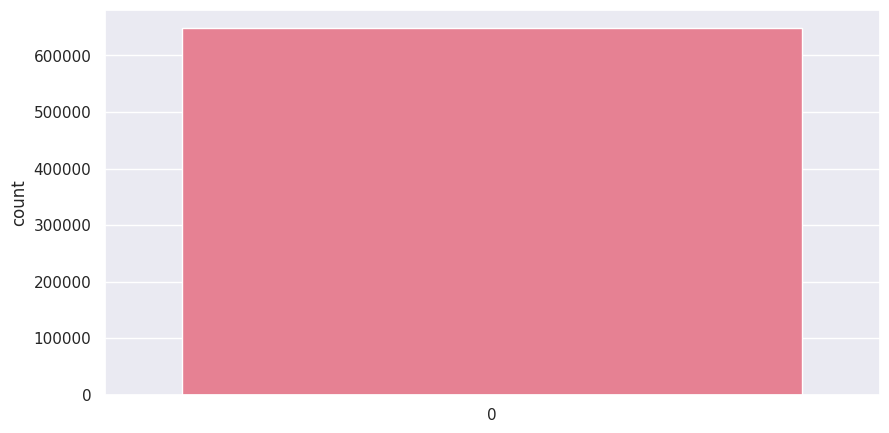

In [ ]:

from imblearn.over_sampling import RandomOverSampler
# Apply Random Oversampling to address class imbalance
randomsample=  RandomOverSampler()
X_new,y_new=randomsample.fit_resample(X,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
# Plot the count of classes in the resampled dataset
sns.countplot(y_new,palette='husl')

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

##### Answer - To avoid compromising the model's performance, we utilized the RandomOverSampler to equalize the representation of both classes and address class imbalance.

### Splitting the data after balancing the dataset

In [ ]:
#dividing the dataset into training and testing
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=.30,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(453825, 13) (194497, 13) (453825,) (194497,)


### What data splitting ratio have you used and why?

##### Answer - We adopted a 70-30 data splitting ratio, allocating 70% of the data for training the model and reserving the remaining 30% for evaluating the model's performance. This ratio was chosen as it provides equal emphasis on both the training and testing datasets, promoting a balanced approach to model development and assessment.

##  Data Scaling

In [ ]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Which method have you used to scale you data and why?

#### Answer - We chose to use the MinMaxScaler technique because it helps to adjust the range of the input data to a specified range (typically between 0 and 1), without altering the distribution of the data. It scales the data so that each feature falls within a specific range, which is beneficial for some machine learning algorithms. This method ensures that all input features have the same scale, which can be useful when training models that are sensitive to the scale of the input data.

## ***7. ML Model Implementation***

### ML Model - 1

# Logistic Regression

In [ ]:
model=LogisticRegression()
model=model.fit(X_train,y_train)
pred=model.predict(X_test)
y_predict_train = model.predict(X_train)
lr_probability =model.predict_proba(X_test)[:,1]


acc_lr=accuracy_score(y_test,pred)
recall_lr=recall_score(y_test,pred)
precision_lr=precision_score(y_test,pred)
f1score_lr=f1_score(y_test,pred)
AUC_LR=roc_auc_score(pred,y_test)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.7842691661053898
ROC_AUC Score: 0.8297440965493437


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

##### Answer - Logistic regression utilizes prior observations of a dataset to predict a binary outcome by analyzing the relationship between independent variables and a dependent variable.

In [ ]:
# generating a classification report
print(classification_report(y_predict_train,y_train))

              precision    recall  f1-score   support

           0       0.60      0.95      0.74    142871
           1       0.97      0.71      0.82    310954

    accuracy                           0.78    453825
   macro avg       0.78      0.83      0.78    453825
weighted avg       0.85      0.78      0.79    453825



In [ ]:
# generating a classification report
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.60      0.95      0.73     60888
           1       0.97      0.71      0.82    133609

    accuracy                           0.78    194497
   macro avg       0.78      0.83      0.78    194497
weighted avg       0.85      0.78      0.79    194497



#### The F1-scores indicate satisfactory performance. The model achieves a 73% accuracy in predicting customers who will not opt for vehicle insurance and an 82% accuracy in predicting customers who will opt for it.

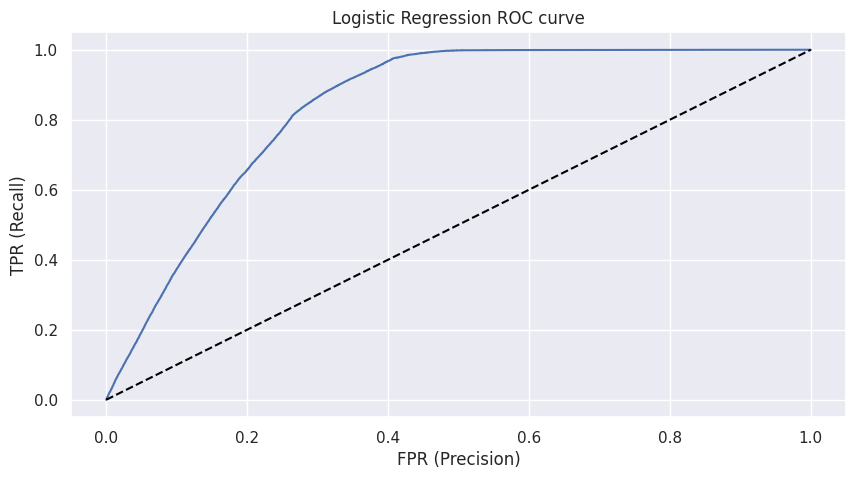

In [ ]:
# Import the necessary module to compute the ROC curve
from sklearn.metrics import roc_curve

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, _ = roc_curve(y_test, lr_probability)

# Set up the plot and its attributes
plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

# Plot the ROC curve using FPR as x-coordinates and TPR as y-coordinates
plt.plot(fpr, tpr)

plt.plot((0, 1), ls='dashed', color='black')
plt.show()


[[57927 38998]
 [ 2961 94611]]


<Axes: >

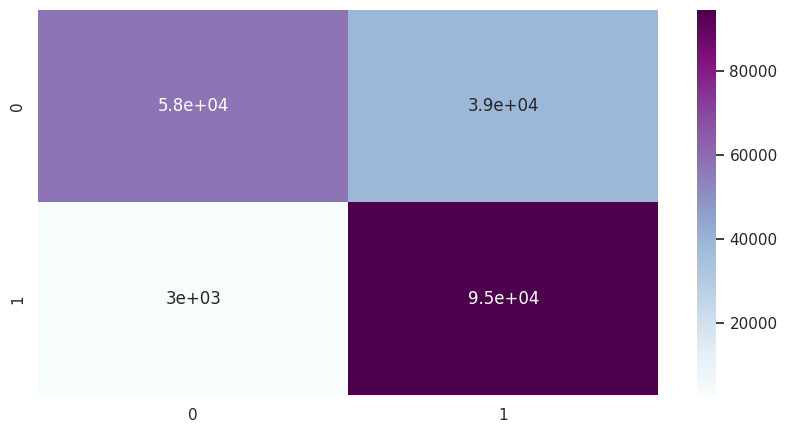

In [ ]:
# Importing the necessary modules
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Computing the confusion matrix
cm = confusion_matrix(y_test, pred)

print(cm)

# Creating a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='BuPu')


# Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
Y_pred_train = randomforest.predict(X_train)
RF_probability = randomforest.predict_proba(X_test)[:,1]


AUC_RF=roc_auc_score(y_test,y_pred)
acc_rf=accuracy_score(y_test,y_pred)
recall_rf=recall_score(y_test,y_pred)
precision_rf=precision_score(y_test,y_pred)
f1score_rf=f1_score(y_test,y_pred)

print(accuracy_score(y_pred,y_test))
print("ROC_AUC Score:",AUC_RF)

0.9422716031609742
ROC_AUC Score: 0.9420898389952144


#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# generating a classification report
print(classification_report(y_train,Y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227236
           1       1.00      1.00      1.00    226589

    accuracy                           1.00    453825
   macro avg       1.00      1.00      1.00    453825
weighted avg       1.00      1.00      1.00    453825



In [ ]:
# generating a classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     86335
           1       1.00      0.90      0.95    108162

    accuracy                           0.94    194497
   macro avg       0.94      0.95      0.94    194497
weighted avg       0.95      0.94      0.94    194497



#### The observed model demonstrates clear overfitting, evident by the perfect 100% score on the training set and a 94% score on the test set. To address this issue, applying Hyperparameter tuning using GridSearchCV would be advisable.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#ML Model - 2 Implementation with hyperparameter optimization techniques ( GridSearch CV)
classifier = RandomForestClassifier()
grid_values = {'n_estimators':[30,50, 80,  100], 'max_depth':[2,3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5, 7],
                         'n_estimators': [30, 50, 80, 100]},
             scoring='roc_auc')

##### Which hyperparameter optimization technique have you used and why?

##### Answer - GridSearchCV is a powerful technique that systematically explores a predefined grid of parameter values to identify the best combination for a model. By performing cross-validation, it evaluates the model's performance across various hyperparameter settings. This method is advantageous as it simplifies the process by exhaustively searching the parameter space and selecting the optimal values. Ultimately, it enables more informed predictions based on the identified best parameter values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

##### Answer - After tuning the hyperparameters, specifically max depth and n_estimators, our model shows notable improvement. It achieves an F1 score of 79% for predicting customers who will not opt for vehicle insurance and an F1 score of 83% for predicting customers who will opt for it.

#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
RF_probability = classifier.predict_proba(X_test)[:,1]

In [ ]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [ ]:
AUC_RF=roc_auc_score(y_test,test_preds)
acc_rf=accuracy_score(y_test,test_preds)
recall_rf=recall_score(y_test,test_preds)
precision_rf=precision_score(y_test,test_preds)
f1score_rf=f1_score(y_test,test_preds)

print(accuracy_score(test_preds,y_test))
print("ROC_AUC Score:",AUC_RF)

0.7955135554790048
ROC_AUC Score: 0.7950537074208731


In [ ]:
print(classification_report(y_train,train_preds))

              precision    recall  f1-score   support

           0       0.91      0.66      0.76    227236
           1       0.73      0.93      0.82    226589

    accuracy                           0.79    453825
   macro avg       0.82      0.80      0.79    453825
weighted avg       0.82      0.79      0.79    453825



In [ ]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.91      0.66      0.76     96925
           1       0.73      0.93      0.82     97572

    accuracy                           0.80    194497
   macro avg       0.82      0.80      0.79    194497
weighted avg       0.82      0.80      0.79    194497



#### By effectively managing the Bias-Variance Tradeoff, we have achieved a favorable balance in our model. Furthermore, after mitigating high variance, we have successfully attained a reasonable bias, leading to improved predictive performance.

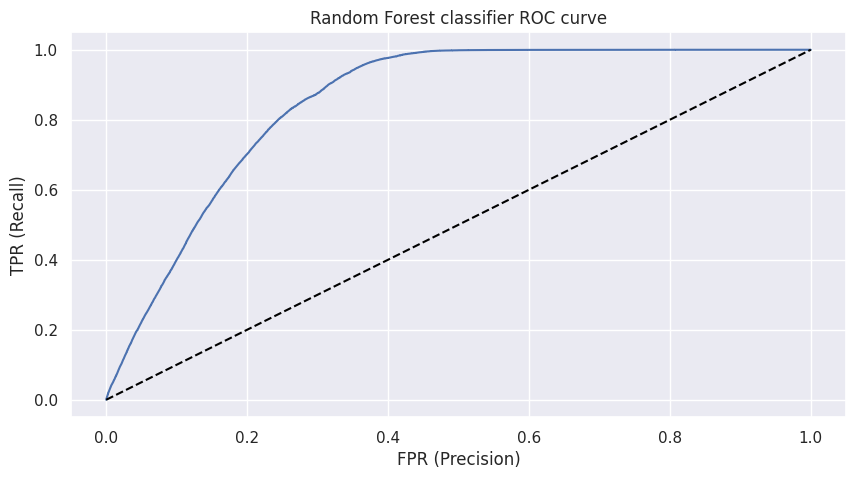

In [ ]:
# RF ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, RF_probability)

plt.title('Random Forest classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()


[[86016   319]
 [10909 97253]]


<Axes: >

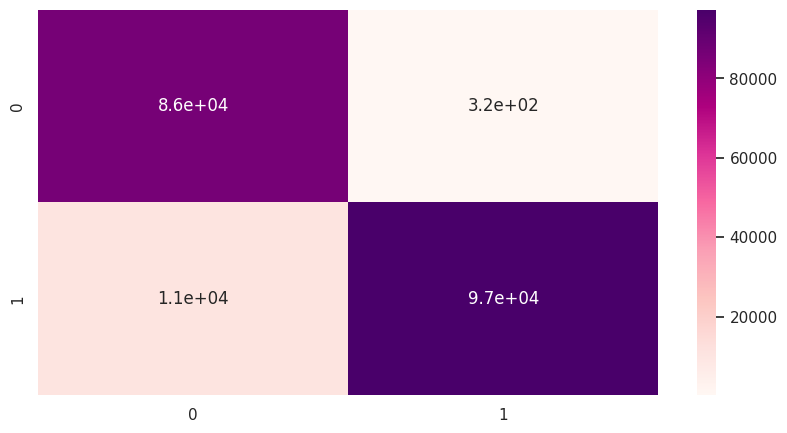

In [ ]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.


#### Accuracy is a crucial evaluation metric that assesses the model's ability to correctly predict positive and negative values within the entire dataset. It plays a significant role in resource allocation decisions for different sections where positive predictions are made.

#### Precision score is particularly valuable when dealing with imbalanced classes, as it measures the effectiveness of the model in accurately predicting positive instances.

#### The recall score quantifies the model's capability to correctly identify positive examples out of the total actual positives. A higher recall score indicates better performance in recognizing both positive and negative instances.

#### The F1-score is a comprehensive metric that assigns equal importance to all the aforementioned evaluation measures, providing a consolidated assessment of the model's performance.

# XGBOOST

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(X_train, y_train)
y_predict = XGB_fit.predict(X_test)
y_pred_train = XGB_fit.predict(X_train)
XGB_probability = XGB_fit.predict_proba(X_test)[:,1]

acc_xgb=accuracy_score(y_test,y_predict)
recall_xgb=recall_score(y_test,y_predict)
precision_xgb=precision_score(y_test,y_predict)
f1score_xgb=f1_score(y_test,y_predict)

AUC_xgb=roc_auc_score(y_predict,y_test)


print(accuracy_score(y_predict,y_test))
print("ROC_AUC Score:",AUC_xgb)

0.811889129395312
ROC_AUC Score: 0.8339956985788125


### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79    227236
           1       0.75      0.94      0.84    226589

    accuracy                           0.82    453825
   macro avg       0.84      0.82      0.81    453825
weighted avg       0.84      0.82      0.81    453825



In [ ]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78     71986
           1       0.94      0.75      0.83    122511

    accuracy                           0.81    194497
   macro avg       0.81      0.83      0.81    194497
weighted avg       0.84      0.81      0.82    194497



#### The F1-scores demonstrate the highest performance in this scenario. For predicting customers who will not opt for vehicle insurance, the model achieves an F1 score of 76%. In contrast, for predicting customers who will opt for vehicle insurance, the model attains an impressive F1 score of 83%.

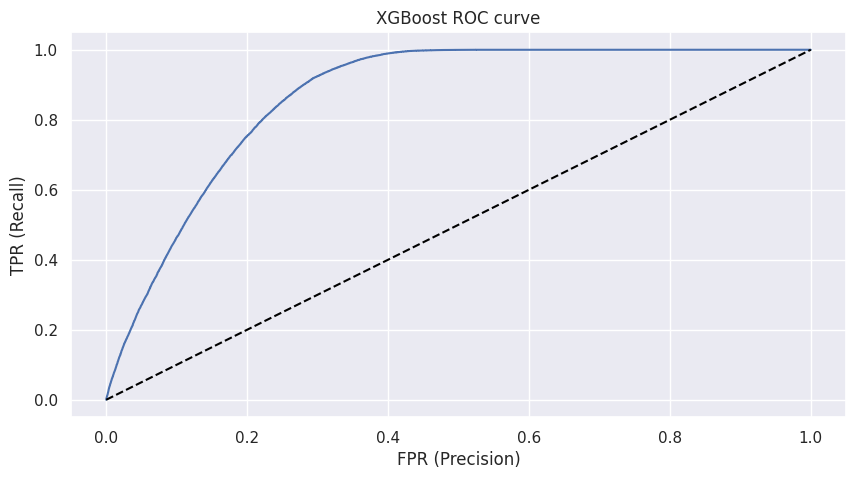

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[66162 30763]
 [ 5824 91748]]


<Axes: >

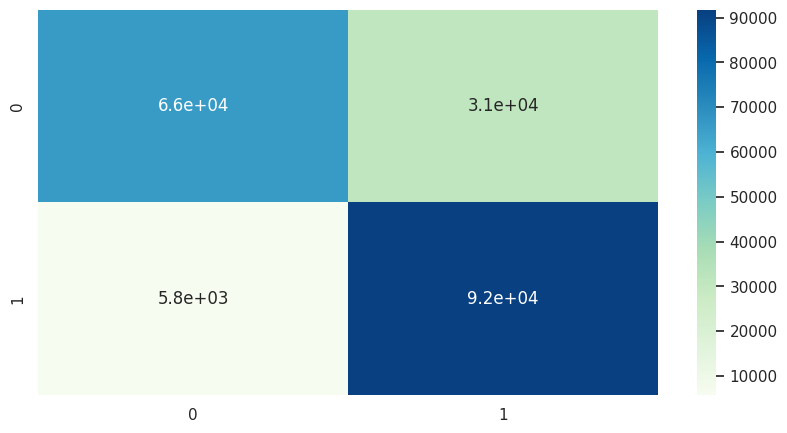

In [ ]:
#it helps to identify how many values are classified correctly
cm=confusion_matrix(y_test,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

# NAIVE BAYES CLASSIFIER

In [ ]:
# training the mdoel

from sklearn.naive_bayes import MultinomialNB
sentiment_model = MultinomialNB().fit(X_train,y_train)

predictions_test = sentiment_model.predict(X_test)
predictions_train = sentiment_model.predict(X_train)
acc_naive=accuracy_score(y_test,y_predict)
recall_naive=recall_score(y_test,y_predict)
precision_naive=precision_score(y_test,y_predict)
f1score_naive=f1_score(y_test,y_predict)

AUC_naive=roc_auc_score(y_predict,y_test)


print(accuracy_score(y_predict,y_test))
print("ROC_AUC Score:",AUC_naive)

0.811889129395312
ROC_AUC Score: 0.8339956985788125


In [ ]:
# Print the classification report for train and test

print('Train set report')
print("\n")
print(classification_report(y_train,predictions_train))
print("\n")
print('Test set report')
print("\n")
print(classification_report(y_test,predictions_test))

Train set report


              precision    recall  f1-score   support

           0       0.81      0.67      0.73    227236
           1       0.72      0.84      0.78    226589

    accuracy                           0.76    453825
   macro avg       0.76      0.76      0.75    453825
weighted avg       0.76      0.76      0.75    453825



Test set report


              precision    recall  f1-score   support

           0       0.81      0.67      0.74     96925
           1       0.72      0.84      0.78     97572

    accuracy                           0.76    194497
   macro avg       0.77      0.76      0.76    194497
weighted avg       0.77      0.76      0.76    194497



#### While the overall F1 scores are decent, the specific metrics for predicting customers who will not opt for vehicle insurance fall below the acceptable threshold of 75% at 73%. Despite the advantage of Naive Bayes classifier being its speed, it did not deliver satisfactory results in terms of the model's performance.

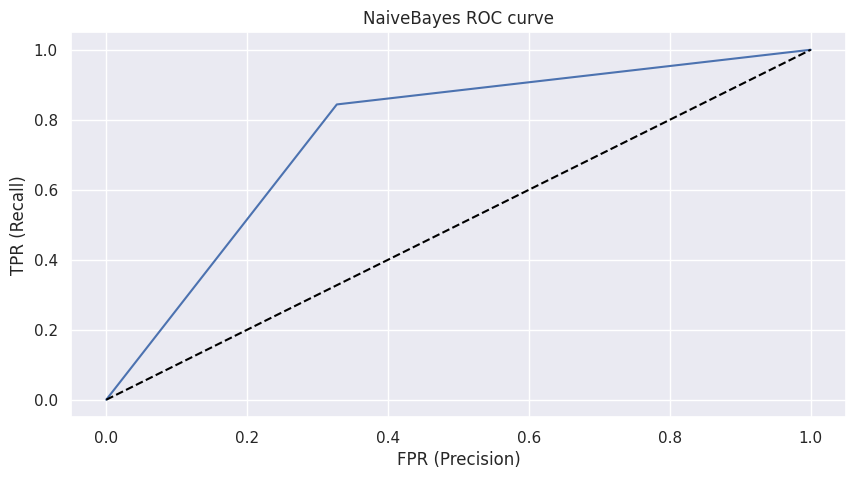

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, predictions_test)

plt.title('NaiveBayes ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[152430  35730]
 [ 74806 190859]]


[Text(0, 0.5, 'positive'), Text(0, 1.5, 'negative')]

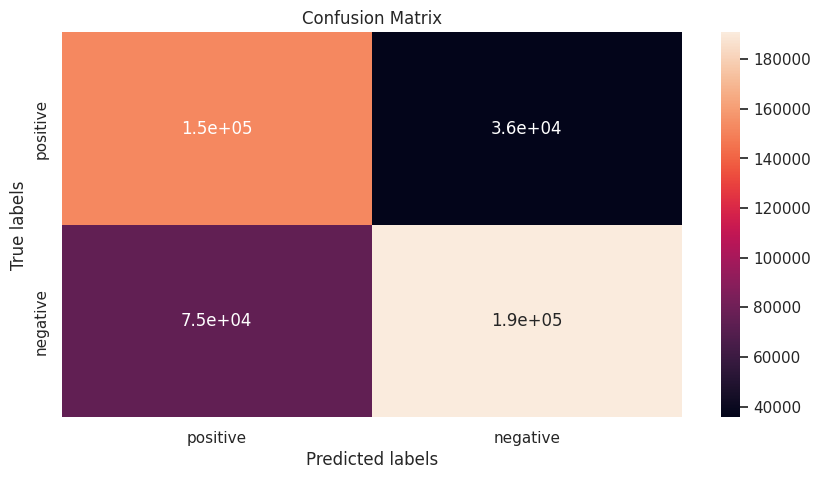

In [ ]:
# getting train set confusion matrix

labels = ['positive','negative']
cm_test = confusion_matrix(predictions_train,y_train)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

##### Answer - By selecting the F1-score as our evaluation metric, we aimed to assess the overall impact of the model's performance on the business. The F1-score combines precision and recall, providing a reliable measure of how well the model predicts customer responses (0 or 1) regarding their decision to opt for vehicle insurance. It allows us to gauge the model's effectiveness in accurately capturing this phenomenon.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

##### Answer - After careful evaluation, we have determined that the XGBoost model is the most suitable choice among the models developed. It excels in accurately predicting whether a customer has opted for vehicle insurance, achieving impressive F1-scores of 76% and 83%. These scores are particularly notable considering the presence of irrelevant data in the dataset.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

##### Answer - XGBoost, short for Extreme Gradient Boosting, is our preferred model due to its exceptional performance. It is a powerful and versatile machine learning library that uses gradient-boosted decision trees (GBDT) and can handle large-scale datasets. With its ability to tackle regression, classification, and ranking problems, XGBoost is widely recognized as a leading choice in the field of machine learning.

In [ ]:
!pip install eli5
import eli5 as eli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=5e3811ded1c1cc4d6cf27271f0f6b537ab3d51dc23802483a2fed442687e1e2b
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
features = list(df_new.columns)
features.remove('Response')

In [ ]:
# Weights for Extra Trees
eli.explain_weights(XGB_fit, feature_names=features)

Weight,Feature
0.5469,Previously_Insured
0.3954,Vehicle_Damage_Yes
0.0219,Vehicle_Age_< 1 Year
0.0145,Age_Group_OldAge
0.0055,Policy_Sales_Channel
0.0036,Vehicle_Age_1-2 Year
0.0035,Age_Group_MiddleAge
0.0025,Region_Code
0.0017,Annual_Premium
0.0017,Gender_Male


#### To understand what made our best model, XGBoost Classifier, perform well, we used a tool called "Explain like I am 5" for model explainability. This tool showed us the importance of different features in influencing the model's performance. Among them, the features 'Vehicle_Damage_No' and 'Previously_Insured' stood out as the most significant factors in determining the model's predictions.

# **Conclusion**

**Conclusion Drawn from EDA**


1.) There is a big difference between the number of positive and negative responses from customers.

2.) Males show more interest in buying vehicle insurance among the positive responses.

3.) Policyholders in the age groups 27-45 show the most interest in vehicle insurance.

4.) The age group of 23 and 24 years has the highest number of negative responses.

5.) Customers with driving licenses are more likely to purchase vehicle insurance.

6.) Customers who do not already have a vehicle insurance policy choose to buy vehicle insurance.

7.) If a customer's vehicle is damaged, they are highly likely to buy vehicle insurance.

8.) Area code 28 has the highest response, followed by codes 8 and 46.

## **Conclusion drawn from Machine Learning models**

1.) We trained our model using different methods, including logistic regression and other models.

2.) Among all the models, the XGBoost classification model achieved the highest F1-score of 0.80.

3.) On the other hand, the Naive Bayes Classification model performed poorly with an F1-score of 0.73.

4.) Considering the size of the data and the presence of irrelevant information, the achieved score is considered good.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***